<a href="https://colab.research.google.com/github/dpetrovic89/FastAi-CNN-Classification-Zvezdasi/blob/main/FastAi_CNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -Uqq fastbook

     |████████████████████████████████| 727kB 20.2MB/s 
     |████████████████████████████████| 1.2MB 55.2MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
     |████████████████████████████████| 194kB 59.6MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 


In [2]:
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *
from pathlib import Path


Mounted at /content/gdrive


Assign all images that are saved to zvezdasi folders to fns

In [7]:
path = Path('/content/gdrive/MyDrive/Colab Notebooks/Practice/Portfolio Projects/CNN FastAi Classification/zvezdasi')
fns = get_image_files(path)


Delete the images that are corrupted when downloaded from the internet using Path.unlink


In [8]:
failed = verify_images(fns)
failed.map(Path.unlink);


**Dataloader**

> the types of data

> how to get data

> how to get the labels of the dataset

> how to split the data into train and validation set



In [9]:
zvezdasi = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=1),
    get_y=parent_label,
    item_tfms=Resize(128))
    
dls = zvezdasi.dataloaders(path)


> **blocks=(ImageBlock, CategoryBlock)** : Specify the data types of the variable used to predict and the label. In this case, it is Image and Category (the type of dog)

> **get_items** : Function to get the images from the provided path
splitter : Split the data into train and validation set. 20% of the data is used for validation. seed is used to get the same split every time we use DataBlock

> **get_y** : Get the labels by getting the name of the folder a file is in. In this case, it is “Winner”, “Chihuahua”, and “Basset Hound”

> **item_tfms** : This stands for item transformer, which is responsible for transforming the item. Here we resize the image to a 128-pixel square.


View 10 random images in our dataloaders


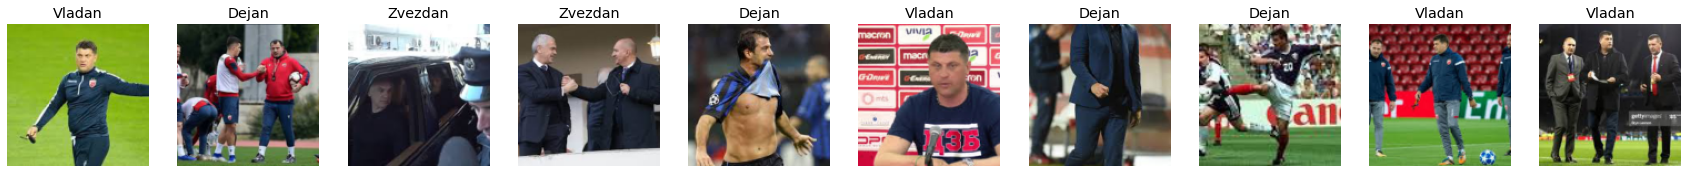

In [10]:
dls.valid.show_batch(max_n=10, nrows=1)


**Random Resize**


Resize crops the images to fit a square shape. This might result in a loss of important pieces of images. So instead of cropping the same area, we will use **RandomResizedCrop** to randomly select and crop one part of the image.


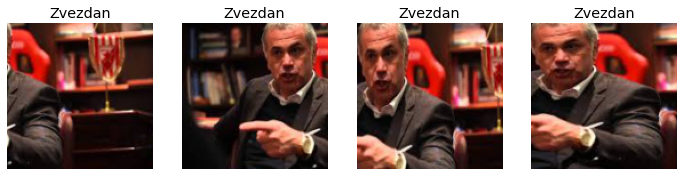

In [11]:
zvezdasi = zvezdasi.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = zvezdasi.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)


**Data Augmentation**

To create more training data, we will use **batch_tfms** to apply augmentations to a whole dataset. This means to rotate, flip, change the brightness of the images, etc to create different images from the same image.


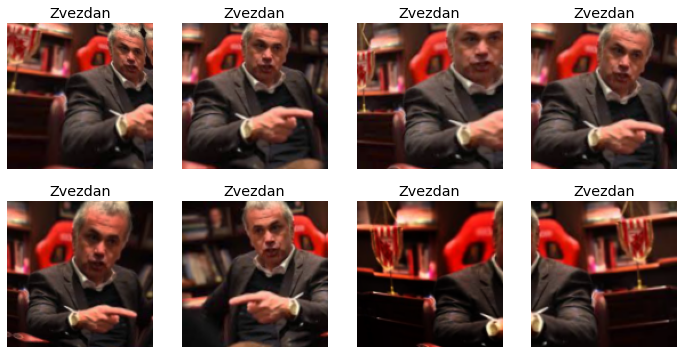

In [12]:
zvezdasi = zvezdasi.new(item_tfms=Resize(128), batch_tfms=aug_transforms())
dls = zvezdasi.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)


Combine both techniques to get the benefits of both transformations


In [13]:
zvezdasi = zvezdasi.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = zvezdasi.dataloaders(path)


# Train

We will use a convolution neural network (CNN) with architecture **ResNet** to train our model.

**cnn_learner** will also load a pre-trained model that have already been trained to recognize a thousand different categories across 1.3 million photos.

**fine_tune**(4) tells fastai to fit the model using 4 epochs (each epoch is one cycle through the full training dataset).



In [20]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(14)


epoch,train_loss,valid_loss,error_rate,time
0,1.504902,1.279165,0.493333,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.685888,0.682994,0.266667,00:04
1,0.691235,0.579588,0.240000,00:04
2,0.628742,0.602269,0.226667,00:04
3,0.573444,0.882794,0.280000,00:04
4,0.512302,0.832603,0.293333,00:04
5,0.452129,0.634351,0.200000,00:04
6,0.404767,0.627743,0.200000,00:04
7,0.351918,0.533586,0.173333,00:04
8,0.310043,0.552426,0.133333,00:04
9,0.270780,0.626257,0.120000,00:04


## Evaluate our model


Impresive only error loss of 12%  with pictures being bellow 10kb of quality and only around 300 examples.

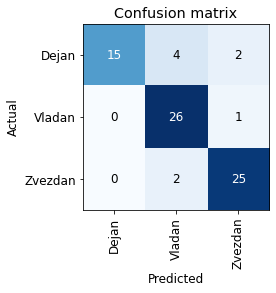

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


what model predicted wrong

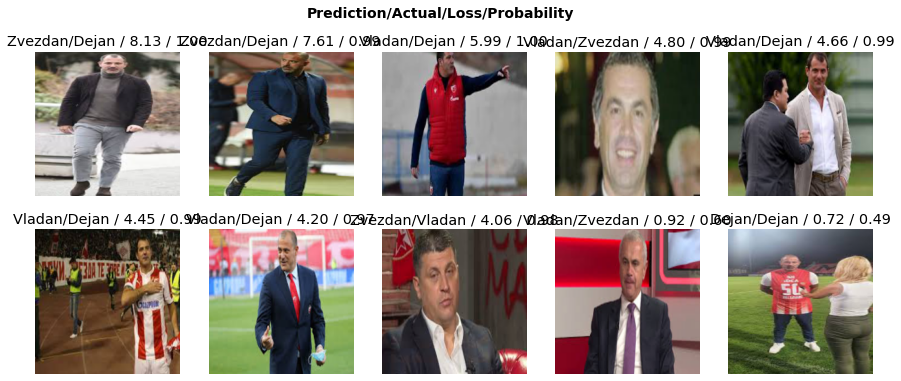

In [23]:
interp.plot_top_losses(10, nrows=2)


# Save the model


In [24]:
learn.export('zvezdasi.pkl')
